# NLP Basics

### Content Page:
1. Project Planning and Scope Definition (Samuel)
2. Loading Data and Data Cleaning (Diontae)
3. POS Tagging and Grammars (Samuel)
4. Model Building and Evaluation (Yu Yang & Jeff)


In this workshop, we will work on figuring out if Amazon customer reviews are positive, negative, or neutral. 
To do this, we're using something called Natural Language Processing (NLP), which is a part of artificial intelligence. 
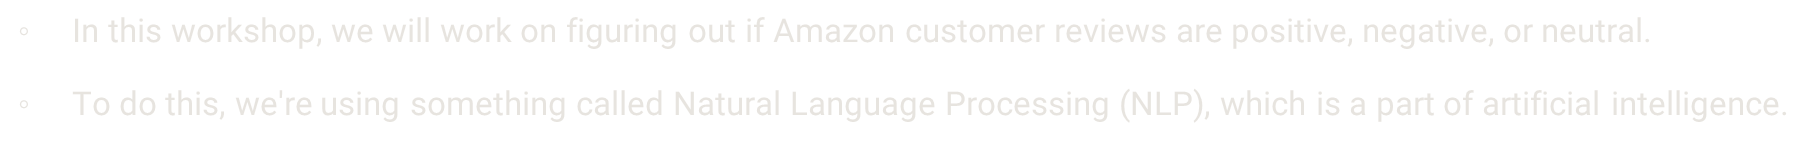

Imagine we have a big pile of written feedback, like comments on Amazon. Our goal is to give this to the computer to read these comments and tell us if they're positive or negative. 
Think of it as giving computers the ability to understand and feel the vibes in the words people use.
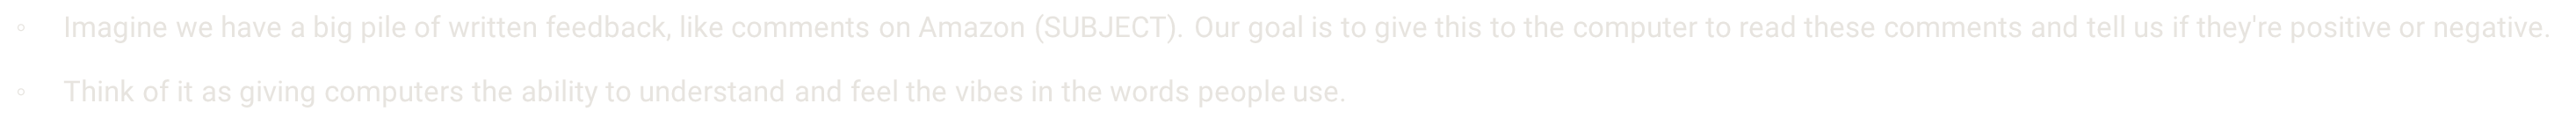

## 1. Project Planning and Scope Definition (Samuel)

The purpose of the project is to analyse text data in the real world, to find out if the data has a positive or negative context.

you will go through a Natural Language Processing Python Project creating a Sentiment Analysis classifier with NLTK's VADER and Huggingface Roberta Transformers. We will explain the two in detail, later in the sections.

The project is to classify the seniment of amazon customer reviews. Hugging face 🤗 provides some great open source models for NLP: https://huggingface.co/models. We will look at the difference between model outputs from the two packages and compare the results. Seniment analysis is an important tool for data scientists to use in laguage modeling.

Source link to Kaggle Notebook: https://www.kaggle.com/robikscube/sen...

In [24]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\weien\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\weien\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\weien\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

## Importing necessary packages into Google Colab notebook

**Pandas**
- A powerful data manipulation and analysis library. It provides ways to work with data structures, like DataFrames. A DataFrame is simply a table of rows and columns.

**Numpy (Numeric Python)**
- A fundamental package for scientific computing in Python. Provides mathematical functions to manipulate data. We call lists "arrays", in the context of Data Science.

**Matplotlib, pyplot**
- A data visualisation library, used to understand data distributions

**Seaborn (Optional)**
- Fanciful way of using matplotlib

**ggplot (Optional)**
- Fanciful appearance of plots.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

Although we can use google drive to mount the dataset to google drive, as our "database", this commented code is just for demonstration. Please do not execute the commented code here.

In [26]:
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

# csv_path = "/content/drive/My Drive/NLP for Overflow/Reviews.csv"

The !wget <http...>, is a shell command (not Python code). It is used to download a file from the specified URL, using the "wget" utility. In this case, it downloads a CSV file, named "reviews.csv", from the given URL.

Then, we read the downloaded CSV file into a dataframe, named "df". This is using pd.read_csv.

In [27]:
#!wget https://cdn.discordapp.com/attachments/1140260435078156359/1173633694523719860/Reviews.csv

df = pd.read_csv("Reviews.csv")

Since the data has downloaded 100% in the Notebook, we say that the data has been fully loaded in, and stored in a variable known as df.

df stands for DataFrame, a fanciful way of saying "a table of rows and columns".

### Random sampling 5k rows, from 500k rows of data

For the purpose of demonstration, we will only random sample 5,000 rows of data. This is due to the original dataset, containing over 500,000 rows, can be too much for beginners to handle.

Hence, 5,000 rows is more manageable.

In [28]:
#df = pd.read_csv('Reviews.csv')
df.shape

(568454, 10)

Given (568454, 10), we know this DataFrame contains 568,454 rows, and 10 columns.

Variables, like the "text", are also called columns.

We now reassign the variable of df into sampled_df, then back to df. Through here, we can visually see the transferring of data between variables. We now know that the df this time is successfully sampled.

In [29]:
df = df.sample(n=5000, random_state=42).reset_index(drop=True)

In [30]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
1,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
2,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
3,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
4,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...


### Quick Exploraration of Data

This is known as exploratory and data analysis. We can see the distribution of data, before doing NLP analysis into it.

`value_counts()` is just a fanciful way of saying "group by its respective scores, into 5 different groups".

In [31]:
df['Score'].value_counts().sort_index()

Score
1     455
2     248
3     378
4     701
5    3218
Name: count, dtype: int64

### Using simple .plot() function to plot the results

This allows the results that has used the group-by function, to plot the results that are aggregated.

In just one line of code, we can visualise the aggregation done earlier. Don't worry about the syntax of .plot() at all, the arguments can be seen, by pressing "shift" + "tab" on Jupyter Notebook.

<Axes: title={'center': 'Count of Reviews by Stars'}, xlabel='Score'>

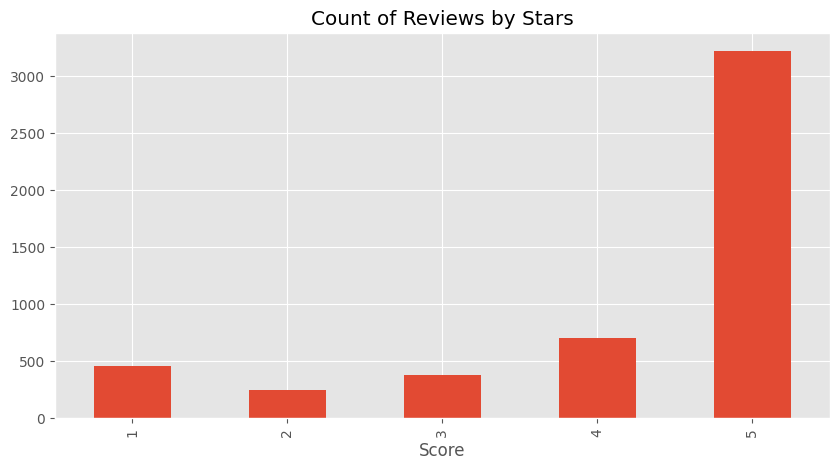

In [32]:
df['Score'].value_counts().sort_index().plot( kind='bar', title='Count of Reviews by Stars', figsize=(10, 5))

Seaborn is a better way to plot our analysis results for scoring. Don't worry, the syntax of Seaborn does not matter the most.

In [33]:
ax = sns.countplot(x=df['Score'].value_counts().sort_index().index,
            y=df['Score'].value_counts().sort_index(), data=df, color='steelblue')

ax.set_xlabel('Review Stars')
ax.set_title('Count of Reviews by Stars')
ax.show()

TypeError: Cannot pass values for both `x` and `y`.

### Basic NLTK

In [ ]:
example = df['Text'][50]
print(example)

With a legendary name like Gevalia, I was disappointed to find that the coffee contains artificial flavors.  The outside packaging looks gourmet and epicurean, with gold lettering.  Unfortunately, artificial flavoring also plainly occupies the front face.<br /><br />The aroma from the coffee is quite pleasant, however, after brewing, the coffee itself is nothing to write home about.  In fact, it tasted rather bitter.<br /><br />I would not buy this item.


## 2. Loading Data and Data Cleaning (Diontae)

### Using Tokenisation to Separate

In [ ]:
nltk.download('punkt')
nltk.word_tokenize(example)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\weien\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['With',
 'a',
 'legendary',
 'name',
 'like',
 'Gevalia',
 ',',
 'I',
 'was',
 'disappointed',
 'to',
 'find',
 'that',
 'the',
 'coffee',
 'contains',
 'artificial',
 'flavors',
 '.',
 'The',
 'outside',
 'packaging',
 'looks',
 'gourmet',
 'and',
 'epicurean',
 ',',
 'with',
 'gold',
 'lettering',
 '.',
 'Unfortunately',
 ',',
 'artificial',
 'flavoring',
 'also',
 'plainly',
 'occupies',
 'the',
 'front',
 'face.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'aroma',
 'from',
 'the',
 'coffee',
 'is',
 'quite',
 'pleasant',
 ',',
 'however',
 ',',
 'after',
 'brewing',
 ',',
 'the',
 'coffee',
 'itself',
 'is',
 'nothing',
 'to',
 'write',
 'home',
 'about',
 '.',
 'In',
 'fact',
 ',',
 'it',
 'tasted',
 'rather',
 'bitter.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'I',
 'would',
 'not',
 'buy',
 'this',
 'item',
 '.']

### 2.1. Using Tokenisation

We will tokenize an example of string of text, an extract of the first ten words.

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['With',
 'a',
 'legendary',
 'name',
 'like',
 'Gevalia',
 ',',
 'I',
 'was',
 'disappointed']

### 2.2. Tokenising text, Removing Stopwords, and Lower Casing

We can define a function that encompasses all the steps to do data cleaning:
1. make the case lower text
2. tokenise the text per row of the dataset
3. stopwords removal. Stopwords refer to words such as "the", "a", etc
4. concatenate all the words into a sentence, using .join() function

To do that, we will do nltk.download('stopwords') and 'punkt'. These are simply packages needed to the cleaning.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text): # A function to clean the text
    for row in text:

      # Lowercase the text (Normalising Text)
      row = text.lower()

      # Remove HTML tags (if any)
      row = ' '.join(row.split())  # Remove extra whitespaces
      row = ''.join(i for i in row if not i.isdigit())  # Remove digits

      # Tokenize the text
      tokens = word_tokenize(row)

      # Remove stopwords and punctuation
      stop_words = set(stopwords.words('english'))
      tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

      return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weien\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\weien\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Then, we clean the text, to cleaned_text. This new variable, saves all the cleaning that is transformed.

We then print out the first 5 columns that we cleaned from cleaned_text. This is denoted as .head()

In [34]:
# Creates a new 'Cleaned_Text' column in the DataFrame by applying the 'clean_text' function to each 'Text' column entry.
df['Cleaned_Text'] = df['Text'].apply(clean_text)

# Print the first few rows of the DataFrame with the cleaned text
print(df['Cleaned_Text'].head())

0    tried couple brands sandwich cookies best bunc...
1    cat loves treats ever ca find house pop top bo...
2    little less expected tends muddy taste expecte...
3    first frosted original size frosted bite size ...
4    want congratulate graphic artist putting entir...
Name: Cleaned_Text, dtype: object


## 3. Part of Speech (POS) (Samuel)

Purpose of Part of Speech:
It is a NLP task, where words in a text are assigned to their corresponding part-of-speech categories. Examples are nouns, verbs, adjectives, and pronouns. Then, each word in the text is tagged with its grammatical category.

Tuple values storing the word, and the part of speech, respectively.

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('With', 'IN'),
 ('a', 'DT'),
 ('legendary', 'JJ'),
 ('name', 'NN'),
 ('like', 'IN'),
 ('Gevalia', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('disappointed', 'VBN')]

- IN - With, stands for preposition
- DT - a, stands for determiner
- JJ - stands for adjetive
- NN - stands for noun
- , - stands for punctuation mark
- PRP - stands for personal pronoun (i)
- VBD - stands for verb, past tense (was)
- VBN - stands for verb, past participle (disappointed)

etc.

### 3.1. Optional: POS tagging's role in sentiment analysis, in NLP

**Feature extraction:**
- POS tags can serve as features for sentiment analysis models. The distribution of certain POS tags, in a text, can provide information about the syntactic structure. This may be relevant to sentiment.

**Context understanding:**
- POS tagging helps in understanding the grammatical structure, and context, of a sentence. This context is crucial for sentiment analysis as the sentiment of a sentence, depends on grammar.

POS does not directly perform sentiment analysis, but provides valuable information about the structure and semantics of a text. This can be used as features for sentiments analysis models.

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  With/IN
  a/DT
  legendary/JJ
  name/NN
  like/IN
  (GPE Gevalia/NNP)
  ,/,
  I/PRP
  was/VBD
  disappointed/VBN
  to/TO
  find/VB
  that/IN
  the/DT
  coffee/NN
  contains/VBZ
  artificial/JJ
  flavors/NNS
  ./.
  The/DT
  outside/JJ
  packaging/NN
  looks/VBZ
  gourmet/JJ
  and/CC
  epicurean/JJ
  ,/,
  with/IN
  gold/JJ
  lettering/NN
  ./.
  Unfortunately/RB
  ,/,
  artificial/JJ
  flavoring/NN
  also/RB
  plainly/RB
  occupies/VBZ
  the/DT
  front/NN
  face./NN
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/VBZ
  The/DT
  aroma/NN
  from/IN
  the/DT
  coffee/NN
  is/VBZ
  quite/RB
  pleasant/JJ
  ,/,
  however/RB
  ,/,
  after/IN
  brewing/NN
  ,/,
  the/DT
  coffee/NN
  itself/PRP
  is/VBZ
  nothing/NN
  to/TO
  write/VB
  home/NN
  about/IN
  ./.
  In/IN
  fact/NN
  ,/,
  it/PRP
  tasted/VBD
  rather/RB
  bitter./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NN
  I/PRP
  would/MD
  not/RB
  buy/VB
  this/DT
  item/NN
  ./.)


### 3.2. Types of Sentiment Analysis Algorithms

**1. Rule/lexicon-based**

- _nice: +2, good: +1, terrible: -3_

- _"Today was a good day."_

`Today: 0, was: 0, a: 0, good: +1, day: 0`

#### $\therefore$ Total valence: +1

**2. Automatic/Machine learning**
- Details are not covered in this workshop
- Just know that it outputs the same type of scoring system, with its own algorithm we may/may not know.

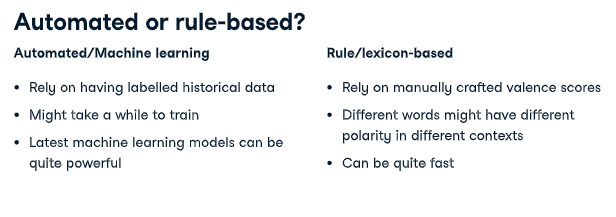

### 3.3. Using Valence Aware Dictionary and sEntiment Reasoner (VADER)

We will use NLTK's `SentimentIntensityAnalyzer`, to get the negative, neutral, or positive scores of the text.

- This uses a "bag of words" approach

1. Stop words are removed
2. Each word is scored and combined into a total score

In [36]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\weien\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
sia

In [38]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

The compound score is a measure of the overall sentiment of the sentence. A positive score indicates a positive sentiment, while a negative score indicates a negative sentiment. The neg, neu, and pos scores are measures of the negative, neutral, and positive sentiment of the sentence, respectively.

### Optional: SIA's Algorithm and our Hypothesis

We can hypothesise that the SIA algorithm takes in the sentiments of all individual words, and sum them up to form overall sentiment for sentence.

In [39]:
example = "I am so happy!"
example = example.split(' ')
print(example)

['I', 'am', 'so', 'happy!']


In [40]:
for word in example:
    print("Score of", word, "is:", sia.polarity_scores(word))

Score of I is: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
Score of am is: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score of so is: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score of happy! is: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6114}


The sentiment of "I", "am", and "so" are all neutral

However, the word "happy!" has a strong positive sentiment score. 

In [41]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

The SIA object says that the sentence, "I am so happy!", is:
- 0% negative, 31.8% neutral, 68.2% positive.
- compound is the aggregation of all three neg/neu/pos, where range of values is -1 < x < 1

### Optional: Is our hypothesis formulated proven right?
Our hypothesis that the SIA algorithm sums up all sentiment scores of all individual words, is not very true. In fact, it ALSO takes into account the context of words.

In [42]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [43]:
example

['I', 'am', 'so', 'happy!']

### 3.4. Running the polarity score on the entire dataset

In [45]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Cleaned_Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/5000 [00:00<?, ?it/s]

The term, .T, is transpose. Don't worry about this jargon, it is simply fanciful e math.

In [ ]:
vaders = pd.____(res).T
vaders

,neg,neu,pos,compound
165257,0.000,0.538,0.462,0.9661
231466,0.037,0.566,0.398,0.9670
427828,0.000,0.769,0.231,0.4588
433955,0.014,0.712,0.275,0.9899
70261,0.066,0.574,0.360,0.9735
...,...,...,...,...
370837,0.287,0.532,0.181,-0.2500
135373,0.066,0.616,0.318,0.9741
268329,0.000,0.481,0.519,0.8689
29455,0.074,0.621,0.305,0.8316


We now save the results of the VADER's algorithm, into a variable, `vaders`.

In [ ]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

Visualising the first five results of VADER

In [ ]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Text
0,165257,0.000,0.538,0.462,0.9661,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,tried couple brands sandwich cookies best bunc...
1,231466,0.037,0.566,0.398,0.9670,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,cat loves treats ever ca find house pop top bo...
2,427828,0.000,0.769,0.231,0.4588,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,little less expected tends muddy taste expecte...
3,433955,0.014,0.712,0.275,0.9899,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",first frosted original size frosted bite size ...
4,70261,0.066,0.574,0.360,0.9735,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...,want congratulate graphic artist putting entir...


### 3.5. Plot VADER results

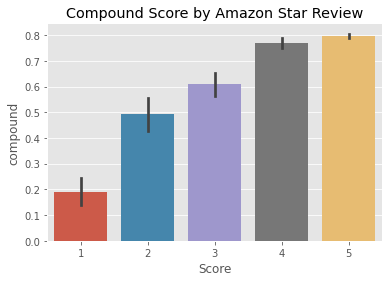

In [ ]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

We can even break it down

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.show()

NameError: name 'plt' is not defined

### Optional: Lemmatization

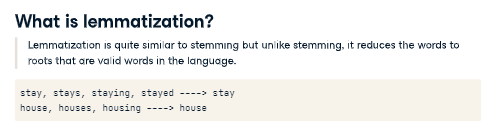

### Optional: Stemming
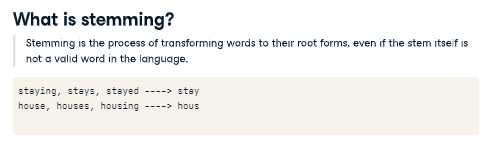

### Optional: Using Uncleaned Text (No Stop Words Removal & Tokenization), into POS

In [ ]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/5000 [00:00<?, ?it/s]

## 4. Using Roberta pretrained model (Yu Yang, Jeff)
- Use a model trained of a large corpus of data
- Transformer model accounts for the words, but also the context related to other words
- This is known as transfer learning

In [ ]:
!pip install transformers

In [ ]:
!pip install torch

In [ ]:
!pip install torch torchvision torchaudio cpuonly -c pytorch

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'pytorch'


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
from transformers import ______, _________

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = __________.from_pretrained(MODEL)
model = __________.from_pretrained(MODEL)

### 4.1. Running Roberta Model on an Example Text

In [ ]:
example = df['Cleaned_Text'][50]
print(example)

legendary name like gevalia disappointed find coffee contains artificial flavors outside packaging looks gourmet epicurean gold lettering unfortunately artificial flavoring also plainly occupies front br br aroma coffee quite pleasant however brewing coffee nothing write home fact tasted rather br br would buy item


In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.25987375, 'roberta_neu': 0.48920235, 'roberta_pos': 0.2509239}


Using the Roberta pre-trained model, we realise that the example sentence, by itself, is mostly negative. The model is 0.82 * 100 = 82.84% sure, that the text has a negative sentiment:

_"With a legendary name like Gevalia, I was disappointed to find that the coffee contains artificial flavors.  The outside packaging looks gourmet and epicurean, with gold lettering.  Unfortunately, artificial flavoring also plainly occupies the front face.<br /><br />The aroma from the coffee is quite pleasant, however, after brewing, the coffee itself is nothing to write home about.  In fact, it tasted rather bitter.<br /><br />I would not buy this item."_

Since we know the code works, we can define it in a function to make it more fanciful:

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

#### The "Softmax" scores is the most important part of this code. We don't really need to understand the rest.

All three categories (neg, neu, pos), have a sum of outputs that add up to 1. These outputs, are simply probabilities ($p$), of what is the probability of it being pos, neu, and neg.

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Cleaned_Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/5000 [00:00<?, ?it/s]

Broke for id 157118
Broke for id 52278
Broke for id 242726
Broke for id 165555
Broke for id 497902


Broke means failed to evaluate, as the text is too long. Hence, the maximum length of the text for roberta may not be under our control. For demonstration purposes, this is okay.

In [ ]:
res

{165257: {'vader_neg': 0.0,
  'vader_neu': 0.538,
  'vader_pos': 0.462,
  'vader_compound': 0.9661,
  'roberta_neg': 0.0062743267,
  'roberta_neu': 0.23964989,
  'roberta_pos': 0.7540758},
 231466: {'vader_neg': 0.037,
  'vader_neu': 0.566,
  'vader_pos': 0.398,
  'vader_compound': 0.967,
  'roberta_neg': 0.002810109,
  'roberta_neu': 0.02327032,
  'roberta_pos': 0.9739196},
 427828: {'vader_neg': 0.0,
  'vader_neu': 0.769,
  'vader_pos': 0.231,
  'vader_compound': 0.4588,
  'roberta_neg': 0.2055711,
  'roberta_neu': 0.61385345,
  'roberta_pos': 0.18057542},
 433955: {'vader_neg': 0.014,
  'vader_neu': 0.712,
  'vader_pos': 0.275,
  'vader_compound': 0.9899,
  'roberta_neg': 0.04561552,
  'roberta_neu': 0.48416802,
  'roberta_pos': 0.47021654},
 70261: {'vader_neg': 0.066,
  'vader_neu': 0.574,
  'vader_pos': 0.36,
  'vader_compound': 0.9735,
  'roberta_neg': 0.007791779,
  'roberta_neu': 0.11481891,
  'roberta_pos': 0.8773893},
 49867: {'vader_neg': 0.0,
  'vader_neu': 0.796,
  'vader

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Text
0,165257,0.000,0.538,0.462,0.9661,0.006274,0.239650,0.754076,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,tried couple brands sandwich cookies best bunc...
1,231466,0.037,0.566,0.398,0.9670,0.002810,0.023270,0.973920,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,cat loves treats ever ca find house pop top bo...
2,427828,0.000,0.769,0.231,0.4588,0.205571,0.613853,0.180575,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,little less expected tends muddy taste expecte...
3,433955,0.014,0.712,0.275,0.9899,0.045616,0.484168,0.470217,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",first frosted original size frosted bite size ...
4,70261,0.066,0.574,0.360,0.9735,0.007792,0.114819,0.877389,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...,want congratulate graphic artist putting entir...


### 4.2. Difference between pre trained model (Roberta) and rule/lexicon based (SIA/VADER)

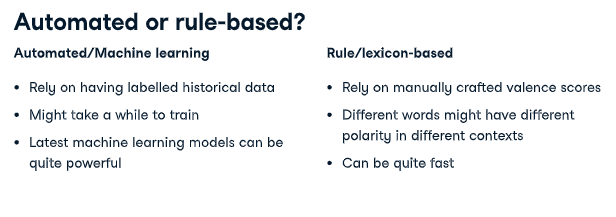

No Training Required: SIA doesn't require training on a specific dataset. It comes with a pre-built lexicon, and sentiment analysis is performed based on this lexicon.
Limited to Lexicon Entries: SIA's performance is dependent on the lexicon it uses. If a word or phrase is not present in the lexicon, its sentiment won't be captured.
Contextual Understanding: Pre-trained models, on the other hand, are trained on large datasets and learn contextual representations of words. They can capture more nuanced sentiments and adapt to different domains.

### 4.3.  Optional: Compare scores between models

In [ ]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text', 'Cleaned_Text'],
      dtype='object')

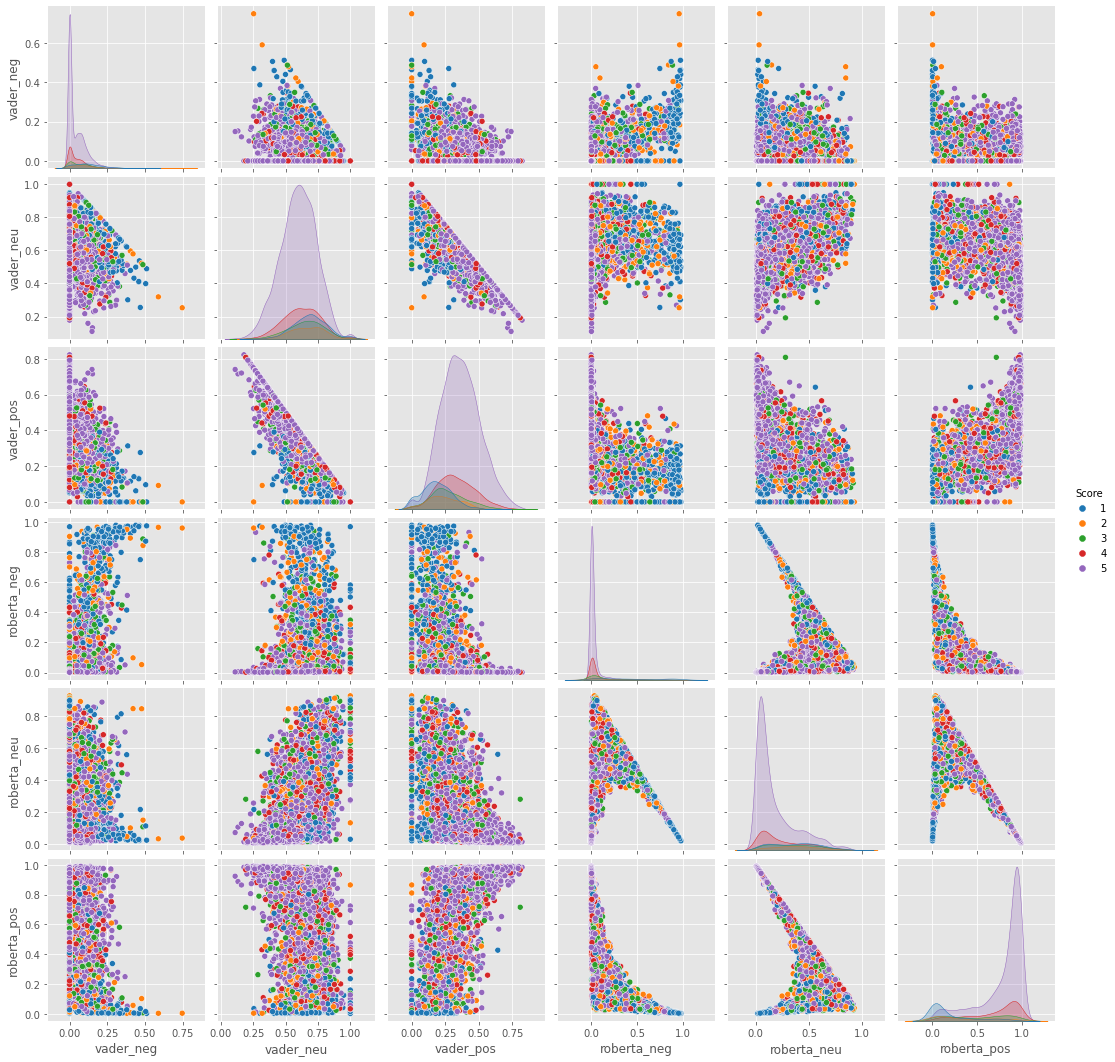

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')

#plt.title('Pairplot Distribution for All Variables')
plt.show()

The 5 star reviews are purplish colour, etc (refer to legend)

If we look at the positive reviews, they are more so to the right on for these 5-star reviews, for the model it is way over to the right

There are some correlations between the roberta model and the vader model, and it is a little hard to see if there are correlations.

One thing for sure is that the VADER model is a little less confident in all of its predictions, compared to the pre-trained model.

It separates the positivity, neutral and negative scores for each of these predicted values. Positive and neutral, Roberta model has very high scores for these 5 stars and most of these (one stars) are very low in sentiment scoring


### Optional: Querying result scores, where score = 1

Let's look at some examples where the model scoring and review score differ the most.

In [ ]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Cleaned_Text'].values[0]

'stated great product cats four cats old young love especially years old male br br store shipping product really fast thank cats george gracie thank br carol sheats'

In [ ]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Cleaned_Text'].values[0]

'like chips liking think order even though like sweet potato'

The VADER model probably misclassified the 


`'I do not like the chips! They are not to my liking and I do not think I will order them again even though I like sweet potato!'`

### Optional: Querying results where score = 5

In [ ]:
# nevative sentiment 5-Star view


In [ ]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Cleaned_Text'].values[0]

'offering misleading bag never discount advertised way overblown beware large bag thought price list price discount misleading'

In [ ]:
results_df.query('Score == 5') \
    .sort_values('roberta_neu', ascending=False)['Cleaned_Text'].values[0]

'equal exchange coffee dark light roast bought directly fromt local farmer business ten years'

In [ ]:
results_df.query('Score == 5') \
    .sort_values('roberta_pos', ascending=False)['Cleaned_Text'].values[0]

'three darling shitzus adore booda bones look forward wonderful treat thank amazon'

In [ ]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Cleaned_Text'].values[0]

'asked review purchase already said fast shipping good product bother reviews problem let know stop using amozon future leave alone'

### Optional: Create a pipeline function to query the model

In [ ]:
from transformers import _____

sent_pipeline = _____("sentiment-analysis", model=model, tokenizer=tokenizer)

DEFINITIONS = {
    'LABEL_0': 'NEUTRAL',
    'LABEL_1': 'NEGATIVE',
    'LABEL_2': 'POSITIVE'
}

In [ ]:
def query_model(input):
    result = ______(input)  # Create a copy of the result
    result[0]['label'] = _______[result[0]['label']] # Map output label to corresponding word
    return result


In [ ]:
query_model('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.972446084022522}]

In [ ]:
query_model('Make sure to like and subscribe!')

[{'label': 'POSITIVE', 'score': 0.7161287069320679}]

In [ ]:
query_model('booo')

[{'label': 'NEGATIVE', 'score': 0.5166526436805725}]